In [1]:
  #this trial is to use VGG16 model
#in these trials the parameters are important and the most important is the batch size and epochs

In [2]:
import pandas as pd
import numpy as np
import keras 
from keras.layers import Dense,Lambda,Flatten,Input
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
import matplotlib.pyplot as plt
import PIL
from PIL import Image

Using TensorFlow backend.


In [3]:
IMAGE_SIZE=[244,244]
#batch_size=no. of training samples in one batch
#epochs =no. of the times the same data is to be feeded
#Iterations is the number of batches needed to complete one epoch

In [4]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
#here i am calling my model with its original weights and not includig the output classes because it had 1000s of classes

In [5]:
#the weights of the state of art model must be kept same
for layer in vgg.layers:
    layer.trainable=False

In [6]:
folder=glob('training/*')

In [7]:
x=Flatten()(vgg.output)

In [8]:
prediction=Dense(8,activation='softmax')(x) #here you may add a dense layer with 500-1000 neurons

In [9]:
model=Model(inputs=vgg.input,outputs=prediction)

In [10]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 244, 244, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 244, 244, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 244, 244, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 122, 122, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 122, 122, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 122, 122, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 61, 61, 128)       0   

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']) # adam is simple optimizer which changes the learning rate accordingly

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,
                                zoom_range=0.2)

In [13]:
validation_dataget=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,
                                zoom_range=0.2)

In [14]:
training_set=train_datagen.flow_from_directory('training',target_size=(244,244),class_mode='categorical',batch_size=32)

Found 1368 images belonging to 8 classes.


In [15]:
test_datagen=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,
                                zoom_range=0.2)

In [16]:
validation_set=test_datagen.flow_from_directory('validation',target_size=(244,244),class_mode='categorical',batch_size=1)

Found 121 images belonging to 8 classes.


In [17]:
print(training_set.class_indices)

{'bumper_dent': 0, 'bumper_scratch': 1, 'door_dent': 2, 'door_scratch': 3, 'glass_shatter': 4, 'head_lamp': 5, 'tail_lamp': 6, 'unknown': 7}


In [18]:
print(validation_set.class_indices)

{'bumper_dent': 0, 'bumper_scratch': 1, 'door_dent': 2, 'door_scratch': 3, 'glass_shatter': 4, 'head_lamp': 5, 'tail_lamp': 6, 'unknown': 7}


In [19]:
history=model.fit_generator(
  training_set,
  samples_per_epoch=1368,
  validation_data=validation_set,
  epochs=7,
  validation_steps=len(validation_set)
)

<ipython-input-19-15a81bbe68bd>:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., epochs=7, validation_steps=121, steps_per_epoch=42)`
  history=model.fit_generator(


Epoch 1/7
42/42 [==============================] - 1897s 45s/step - loss: 1.5934 - accuracy: 0.5022 - val_loss: 1.7288 - val_accuracy: 0.6446
Epoch 2/7
42/42 [==============================] - 1884s 45s/step - loss: 0.7618 - accuracy: 0.7455 - val_loss: 0.0244 - val_accuracy: 0.8099
Epoch 3/7
42/42 [==============================] - 1886s 45s/step - loss: 0.5438 - accuracy: 0.8219 - val_loss: 0.3725 - val_accuracy: 0.8430
Epoch 4/7
42/42 [==============================] - 1898s 45s/step - loss: 0.3857 - accuracy: 0.8728 - val_loss: 0.5705 - val_accuracy: 0.9339
Epoch 5/7
42/42 [==============================] - 1898s 45s/step - loss: 0.2717 - accuracy: 0.9199 - val_loss: 0.1095 - val_accuracy: 0.9091
Epoch 6/7
42/42 [==============================] - 1888s 45s/step - loss: 0.2262 - accuracy: 0.9401 - val_loss: 2.2349e-04 - val_accuracy: 0.9752
Epoch 7/7
42/42 [==============================] - 1890s 45s/step - loss: 0.1910 - accuracy: 0.9469 - val_loss: 0.0959 - val_accuracy: 0.9504


In [20]:
#so here the model is trained with an accuracy of 94.69% in 3.5 hrs of training
#now saving the trained model

In [21]:
model.save('transfer_model.h5')

In [22]:
#now testing is the most important part
file=glob("testing/*")


In [23]:
for filename in file:
    img=Image.open(filename)

'testing\\00-Damaged485.JPEG'

In [25]:
def check_model(filename):                                            # this function somehow didnt repost to multile np.argmax
    photo=image.load_img(filename)
    photo=photo.resize((244,244),resample=PIL.Image.BICUBIC)
    x=image.img_to_array(photo)
    x=np.expand_dims(x,axis=0)
    x/=255.0
    images=np.vstack([x])
    classes=model.predict(images)
    
    print(classes)

In [26]:
check_model('testing\\00-Damaged485.JPEG')

[[9.58372772e-01 9.32618277e-04 3.31985988e-02 1.02414015e-04
  3.88050475e-03 1.08119042e-03 1.11883774e-03 1.31319102e-03]]


In [35]:
#so here there wassome issue with function but the predictions are accurate

In [58]:
photo=image.load_img('testing\\bumper_scratch3.JPEG')
photo=photo.resize((244,244),resample=PIL.Image.BICUBIC)
x=image.img_to_array(photo)
x=np.expand_dims(x,axis=0)
x/=255.0
images=np.vstack([x])
classes=model.predict(images)

In [ ]:
np.argmax(classes) #says bumper scratch

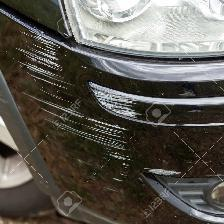

In [60]:
img=Image.open('testing\\bumper_scratch3.JPEG')
img

In [29]:
check_model('testing\\head_lamp17.JPEG')

[[6.6561523e-05 1.1990482e-04 1.9999666e-03 9.0988046e-08 5.9473235e-04
  6.8178229e-02 9.1973335e-01 9.3071684e-03]]


In [30]:
#np.argmax(check_model('testing\\head_lamp17.JPEG'))

[[6.6561523e-05 1.1990482e-04 1.9999666e-03 9.0988046e-08 5.9473235e-04
  6.8178229e-02 9.1973335e-01 9.3071684e-03]]


0

In [31]:
check_model('testing\\glass_shatter29.JPEG')

[[1.1610929e-06 2.2347474e-05 3.5427278e-03 1.9076309e-05 9.9533433e-01
  2.4496045e-04 4.0829447e-04 4.2706684e-04]]


In [32]:
#np.argmax(check_model('testing\\glass_shatter29.JPEG'))

[[1.1610929e-06 2.2347474e-05 3.5427278e-03 1.9076309e-05 9.9533433e-01
  2.4496045e-04 4.0829447e-04 4.2706684e-04]]


0

In [33]:
photo=image.load_img('testing\\glass_shatter29.JPEG')
photo=photo.resize((244,244),resample=PIL.Image.BICUBIC)
x=image.img_to_array(photo)
x=np.expand_dims(x,axis=0)
x/=255.0
images=np.vstack([x])
classes=model.predict(images)

In [34]:
np.argmax(classes) #to understand what 4 is refer the class indices

4

In [36]:
img=Image.open('testing\\glass_shatter29.JPEG')

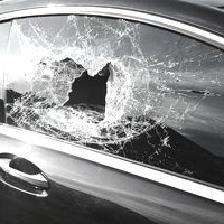

In [37]:
img

In [38]:
photo=image.load_img('testing\\head_lamp17.JPEG')
photo=photo.resize((244,244),resample=PIL.Image.BICUBIC)
x=image.img_to_array(photo)
x=np.expand_dims(x,axis=0)
x/=255.0
images=np.vstack([x])
classes=model.predict(images)

In [39]:
np.argmax(classes)

6

In [42]:
img=Image.open('testing\\head_lamp17.JPEG') #here it said tail lamp...but i had insufficient data so its actually nice prediction

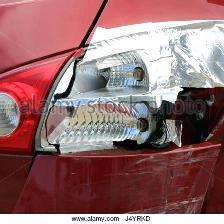

In [43]:
img

In [44]:
photo=image.load_img('testing\\00-Damaged485.JPEG')
photo=photo.resize((244,244),resample=PIL.Image.BICUBIC)
x=image.img_to_array(photo)
x=np.expand_dims(x,axis=0)
x/=255.0
images=np.vstack([x])
classes=model.predict(images)

In [45]:
np.argmax(classes) #its saying bumper dent

0

In [46]:
img=Image.open('testing\\00-Damaged485.JPEG')

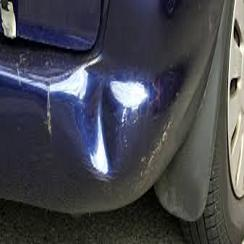

In [47]:
img

In [49]:
photo=image.load_img('testing\\00-Damaged147.JPEG')
photo=photo.resize((244,244),resample=PIL.Image.BICUBIC)
x=image.img_to_array(photo)
x=np.expand_dims(x,axis=0)
x/=255.0
images=np.vstack([x])
classes=model.predict(images)

In [51]:
np.argmax(classes)#its saying door dent

2

In [52]:
img=Image.open('testing\\00-Damaged147.JPEG')

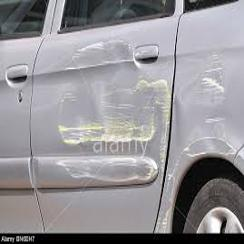

In [53]:
img

In [54]:
#report- I used VGG16 model with its actual weights...so there is no customization in model
#parameters were selected according to the machine
#data formation consumed most of the time
#data is not sufficient so i added more data manually
#the batch size was reduced from 128 to 32
#started with accuracy 15%


In [55]:
#however the accuracy can be increased by moidying the output layer...even different transfer learning may used and no. of epochs can be increased to 10

In [56]:
#the testing data was purely unknown to the machine